# Database feature overview and data management

In [56]:
! pip install plotly

In [111]:
import math
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.datasets import make_classification
import seaborn as sns
import pylab as pl # for plotting normalized distributions
import plotly
import plotly.express as px
# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [2]:
TravelInsurance= pd.read_csv('TravelInsurancePrediction.csv')

In [3]:
TravelInsurance.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
TravelInsurance['GraduateOrNot'].replace({"Yes" :1 , "No": 0}, inplace=True)
TravelInsurance['FrequentFlyer'].replace({"Yes" :1 , "No": 0}, inplace=True)
TravelInsurance['EverTravelledAbroad'].replace({"Yes" :1 , "No": 0}, inplace=True)
TravelInsurance['Employment Type'].replace({"Government Sector" :1 , "Private Sector/Self Employed": 0}, inplace=True)

We change the features that contained yes or no, with 1 and 0 values

In [5]:
TravelInsurance.corr(method='pearson')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,0.115134,1.000000,0.127133,-0.349157,0.003354,0.011553,-0.143790,-0.181098,-0.147847
GraduateOrNot,0.027125,0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,-0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,-0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,-0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,-0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


The feature with the highest correlation with the truth vector is the "EverTravelledAbroad" , so having alredy a traveler experience has the greatest impact on the choiche of buying or not a travel insurance package.

In [6]:
y=TravelInsurance['TravelInsurance']
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

We have 6 binary features (including the truth array), so we can use pie charts to understand and visualize better the database

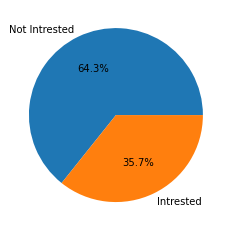

In [25]:
intrested, not_intrested=y.value_counts()
sizes = [intrested, not_intrested]
lbls = ['Not Intrested', 'Intrested']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

Since almost 2/3 of our database it's composed from people that are not intrested in buying a travel insurance package, we expect to have a bias in our model. Later we will try to use a reduced portion of the database having a greater percentage of intrested people.

In [42]:
X=TravelInsurance['Employment Type']
X.value_counts()

0    1417
1     570
Name: Employment Type, dtype: int64

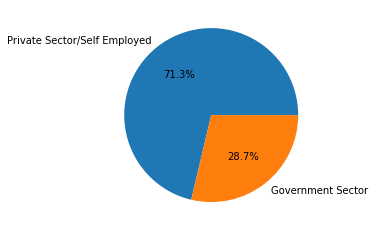

In [43]:
X=TravelInsurance['Employment Type']
intrested, not_intrested=X.value_counts()
sizes = [intrested, not_intrested]
lbls = ['Private Sector/Self Employed', 'Government Sector']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

In [34]:
X=TravelInsurance['GraduateOrNot']
X.value_counts()


1    1692
0     295
Name: GraduateOrNot, dtype: int64

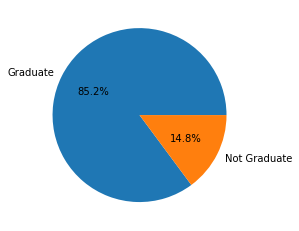

In [32]:
X=TravelInsurance['GraduateOrNot']
intrested, not_intrested=X.value_counts()
sizes = [intrested, not_intrested]
lbls = ['Graduate', 'Not Graduate']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

In [40]:
X=TravelInsurance['FrequentFlyer']
X.value_counts()

0    1570
1     417
Name: FrequentFlyer, dtype: int64

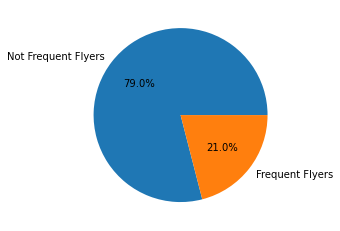

In [41]:
X=TravelInsurance['FrequentFlyer']
intrested, not_intrested=X.value_counts()
sizes = [intrested, not_intrested]
lbls = ['Not Frequent Flyers', 'Frequent Flyers']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

In [38]:
X=TravelInsurance['EverTravelledAbroad']
X.value_counts()

0    1607
1     380
Name: EverTravelledAbroad, dtype: int64

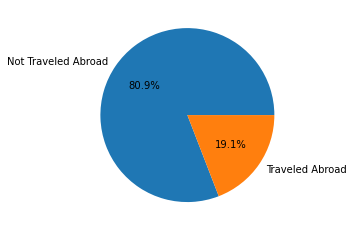

In [39]:
X=TravelInsurance['EverTravelledAbroad']
intrested, not_intrested=X.value_counts()
sizes = [intrested, not_intrested]
lbls = ['Not Traveled Abroad', 'Traveled Abroad']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

In [44]:
X=TravelInsurance[]
X.value_counts()

0    1435
1     552
Name: ChronicDiseases, dtype: int64

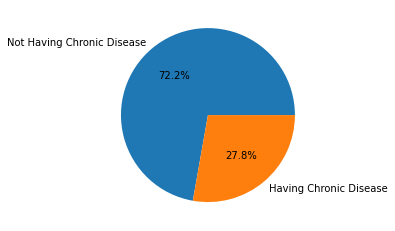

In [45]:
X=TravelInsurance['ChronicDiseases']
intrested, not_intrested=X.value_counts()
sizes = [intrested, not_intrested]
lbls = ['Not Having Chronic Disease', 'Having Chronic Disease']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

For the continuos variable we can plot their values

In [109]:
continuous_data = TravelInsurance[['Age','AnnualIncome','FamilyMembers','TravelInsurance']]

In [108]:
import scipy.stats as stats

def continuous_graph(header_name , title):
  all_data = continuous_data[header_name]
  targets = continuous_data['TravelInsurance']
  pos_vals_init = []
  neg_vals_init = []
  for i in range (len(targets)):
    if (targets[i] == 1):
      pos_vals_init.append(all_data[i])
    else:
      neg_vals_init.append(all_data[i])
  
  pos_vals = sorted(pos_vals_init)
  neg_vals = sorted(neg_vals_init)

  pos_fit = stats.norm.pdf(pos_vals, np.mean(pos_vals), np.std(pos_vals))
  neg_fit = stats.norm.pdf(neg_vals, np.mean(neg_vals), np.std(neg_vals))

  pl.plot(pos_vals, pos_fit,'-o')
  pl.plot(neg_vals, neg_fit,'-r')

  pl.title(title)

  pl.show()

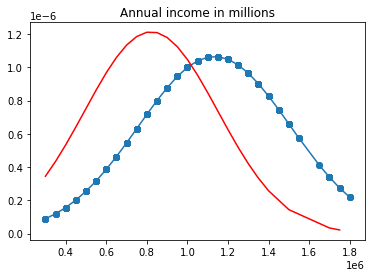

In [112]:
continuous_graph('AnnualIncome' , 'Annual income in millions')

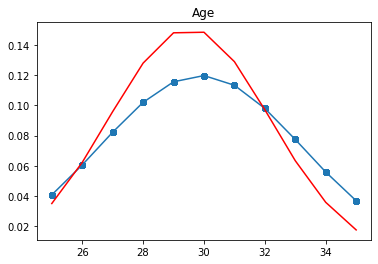

In [113]:
continuous_graph('Age' , 'Age')

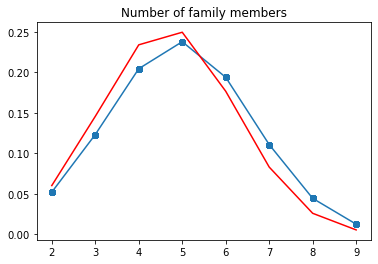

In [114]:
continuous_graph('FamilyMembers' , 'Number of family members')

# Logistic Regression Method

In [67]:
#here the features that we want to use for the analisis
list_of_features=['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers','FrequentFlyer', 'ChronicDiseases', 'EverTravelledAbroad']

In [68]:
X=TravelInsurance[list_of_features]
X

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,ChronicDiseases,EverTravelledAbroad
0,31,1,1,400000,6,0,1,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,0,1,0
3,28,0,1,700000,3,0,1,0
4,28,0,1,700000,8,1,1,0
...,...,...,...,...,...,...,...,...
1982,33,0,1,1500000,4,1,0,1
1983,28,0,1,1750000,5,0,1,1
1984,28,0,1,1150000,6,0,1,0
1985,34,0,1,1000000,6,1,0,1


In [69]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5) 

We split the dataset in two, one half will be used to train the model, the other will we used to check his accuracy, the we split the role of the two datasets to compute an average accuracy

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

In [95]:
from sklearn.metrics import accuracy_score
model.fit(X1, y1)
y2_model = model.predict(X2)
round(accuracy_score(y2, y2_model),6)

0.65996

In [96]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.6253776435045317, 0.6599597585513078)

In [97]:
AveargageAccuracy=(accuracy_score(y1, y1_model)+ accuracy_score(y2, y2_model))/2
print(round(AveargageAccuracy, 4))

0.6427


The final accuracy obtained utilizing this method is rouglhy 64%

Let's try using more data to train the model, using a five-fold cross-validation, in which 4/5 of the dataset are used to train the model, and the other 1/5 is used to test it, changing which portion of the dataset is used as a train or as a test 5 times.

In [98]:
from sklearn.model_selection import cross_val_score
val=(cross_val_score(model, X, y, cv=5))
np.average(val)

0.6426768603723909

Let'a build a for cycle to see how the accuracy change utilizing more validation point

In [99]:
list_of_accuracy=[]
for i in range(2 , 20):
    val=(cross_val_score(model, X, y, cv=i))
    val=round(np.average(val), 5)
    list_of_accuracy.append(val)
list_of_accuracy

[0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64268,
 0.64269,
 0.64268]

The accuracy is basically unchanged augmenting the number of K, so to improve our accuracy we had to use other considerations


## Let's try utilizing only the binary (1 or 0) featuers of the dataset


In [92]:
list_of_features3=['Employment Type', 'GraduateOrNot','ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

In [93]:
X_new2=TravelInsurance[list_of_features3]

In [105]:
 x_train , x_test , y_train , y_test = train_test_split(X_new2 , y , test_size=0.2 , random_state=5) 

In [106]:
list_of_accuracy=[]
for i in range(2 , 40):
    val=(cross_val_score(model, x_train, y_train, cv=i))
    val=round(np.average(val), 5)
    list_of_accuracy.append(val)
Best_Accuracy=max(list_of_accuracy)
Index=list_of_accuracy.index(Best_Accuracy)
print("The highest accuracy obtained is:", Best_Accuracy , " and we had obtanied using K=", Index)

The highest accuracy obtained is: 0.75089  and we had obtanied using K= 31


So utilizing only binary values the accuracy has improved from 64% to 75%

In [147]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10)
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

results = cross_val_score(estimator=model,
                                          X=x_train,
                                          y=y_train,
                                          cv=31,
                                          scoring=scoring)

ValueError: For evaluating multiple scores, use sklearn.model_selection.cross_validate instead. {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)} was passed.

# Gaussian Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB

In [148]:
def GaussNB(run_data):

    x = run_data.drop(columns=['TravelInsurance'] , axis = 1) 
    y = run_data['TravelInsurance']
    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

    model = GaussianNB(var_smoothing = 0.356)  #Choice of smoothing because this yields maximum accuracy for k-fold accuracy
    # fit the model with the training data
    model.fit(x_train,y_train)


    # Predict target on test dataset (which is 25 percent of the train)
    predict_test = model.predict(x_test)

    #Accuracy of test dataset, for comparison
    accuracy_test = accuracy_score(y_test , predict_test)
    print('accuracy_score on test dataset without k-fold CV: ', accuracy_test)

    from sklearn.model_selection import cross_val_score
    print('Accuracy after k-fold CV ' , sum(cross_val_score(model, x_train, y_train, cv=5)/5)) 

    # Adding a confusion matrix for illustration, this for the testing set
    cm = confusion_matrix(y_test, predict_test) 
    print('The Confusion Matrix') 
    print(cm)

In [149]:
GaussNB(TravelInsurance)

accuracy_score on test dataset without k-fold CV:  0.8015075376884422
Accuracy after k-fold CV  0.7766025831795728
The Confusion Matrix
[[256   5]
 [ 74  63]]


In [124]:
GaussNB(continuous_data)

accuracy_score on test dataset without k-fold CV:  0.8015075376884422
Accuracy after k-fold CV  0.7766025831795728
The Confusion Matrix
[[256   5]
 [ 74  63]]


In [125]:
def get_accuracy(smoothing , run_data):
  x = run_data.drop(columns=['TravelInsurance'] , axis = 1) 
  y = run_data['TravelInsurance']
  x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

  model = GaussianNB(var_smoothing=smoothing)

  model.fit(x_train,y_train)

  # Predict target on test dataset (which is 25 percent of the train)
  predict_test = model.predict(x_test)

  from sklearn.model_selection import cross_val_score
  accuracy = sum(cross_val_score(model, x_train, y_train, cv=5))/5  

  #Accuracy of test dataset, for comparison
  #accuracy_test = accuracy_score(y_test , predict_test)

  return accuracy

In [127]:
print(get_accuracy(0.356 , TravelInsurance))

0.7766025831795728


In [128]:
print(get_accuracy(0.356 , continuous_data))

0.7766025831795728


Producing results from dataset

In [129]:
from sklearn.metrics import precision_recall_fscore_support

x = continuous_data.drop(columns=['TravelInsurance'] , axis = 1) 
y = continuous_data['TravelInsurance']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

model = GaussianNB(var_smoothing=0.356)

model.fit(x_train,y_train)

# Predict target on test dataset (which is 20 percent of the train)
predict_test = model.predict(x_test)

from sklearn.model_selection import cross_val_score
accuracy = sum(cross_val_score(model, x_train, y_train, cv=5))/5  

y_test_model = model.fit(x_train, y_train).predict(x_test)
y_train_model = model.fit(x_test, y_test).predict(x_train)
print(accuracy_score(y_train, y_train_model), accuracy_score(y_test, y_test_model))
print(precision_recall_fscore_support(y_train, y_train_model, zero_division=1))
print(precision_recall_fscore_support(y_test, y_test_model, zero_division=0))

0.7702957835116425 0.8015075376884422
(array([0.76441917, 0.79050279]), array([0.9261811, 0.4938918]), array([0.83756119, 0.60794844]), array([1016,  573], dtype=int64))
(array([0.77575758, 0.92647059]), array([0.98084291, 0.45985401]), array([0.86632826, 0.61463415]), array([261, 137], dtype=int64))


Now I want to create a graph showing how the accuracy for the test set changes with varying var_smoothing. The var_smoothing is how far away from the gauss distribution we choose to include values.

The 5-fold CV accuracy is used.



The highest accuracy is found at var_smoothing =  0.356


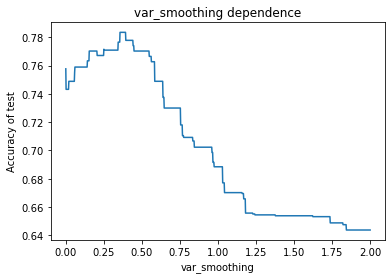

In [130]:
x_of_var = np.linspace(0 , 2 , 1000)
y_of_var = []

for i in x_of_var:
  y_of_var.append(get_accuracy(i , continuous_data))

#Finding the smoothing val of the highest accuracy score
max_accuracy = max(y_of_var)
index = y_of_var.index(max_accuracy)
print('The highest accuracy is found at var_smoothing = ' , round(x_of_var[index] , 3)) 

plt.plot(x_of_var , y_of_var)
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy of test')
plt.title('var_smoothing dependence')
plt.show()

# Random Forest model

In [ ]:
list_of_features=['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers','FrequentFlyer', 'ChronicDiseases', 'EverTravelledAbroad']

In [132]:
X=TravelInsurance[list_of_features]
X

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,ChronicDiseases,EverTravelledAbroad
0,31,1,1,400000,6,0,1,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,0,1,0
3,28,0,1,700000,3,0,1,0
4,28,0,1,700000,8,1,1,0
...,...,...,...,...,...,...,...,...
1982,33,0,1,1500000,4,1,0,1
1983,28,0,1,1750000,5,0,1,1
1984,28,0,1,1150000,6,0,1,0
1985,34,0,1,1000000,6,1,0,1


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [134]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0) # the another criterion is 'gini' 'entropy'
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [136]:
#the actual training, and the result of the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[220,  40],
       [ 50,  88]], dtype=int64)

In [137]:
accuracy_score(y_test, y_pred)

0.7738693467336684

In [138]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       260
           1       0.69      0.64      0.66       138

    accuracy                           0.77       398
   macro avg       0.75      0.74      0.75       398
weighted avg       0.77      0.77      0.77       398

